#A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/weather_forecast_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
data.head()

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain

In [5]:
data.describe()

Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593

In [6]:
data.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [7]:
data.duplicated().sum()

0

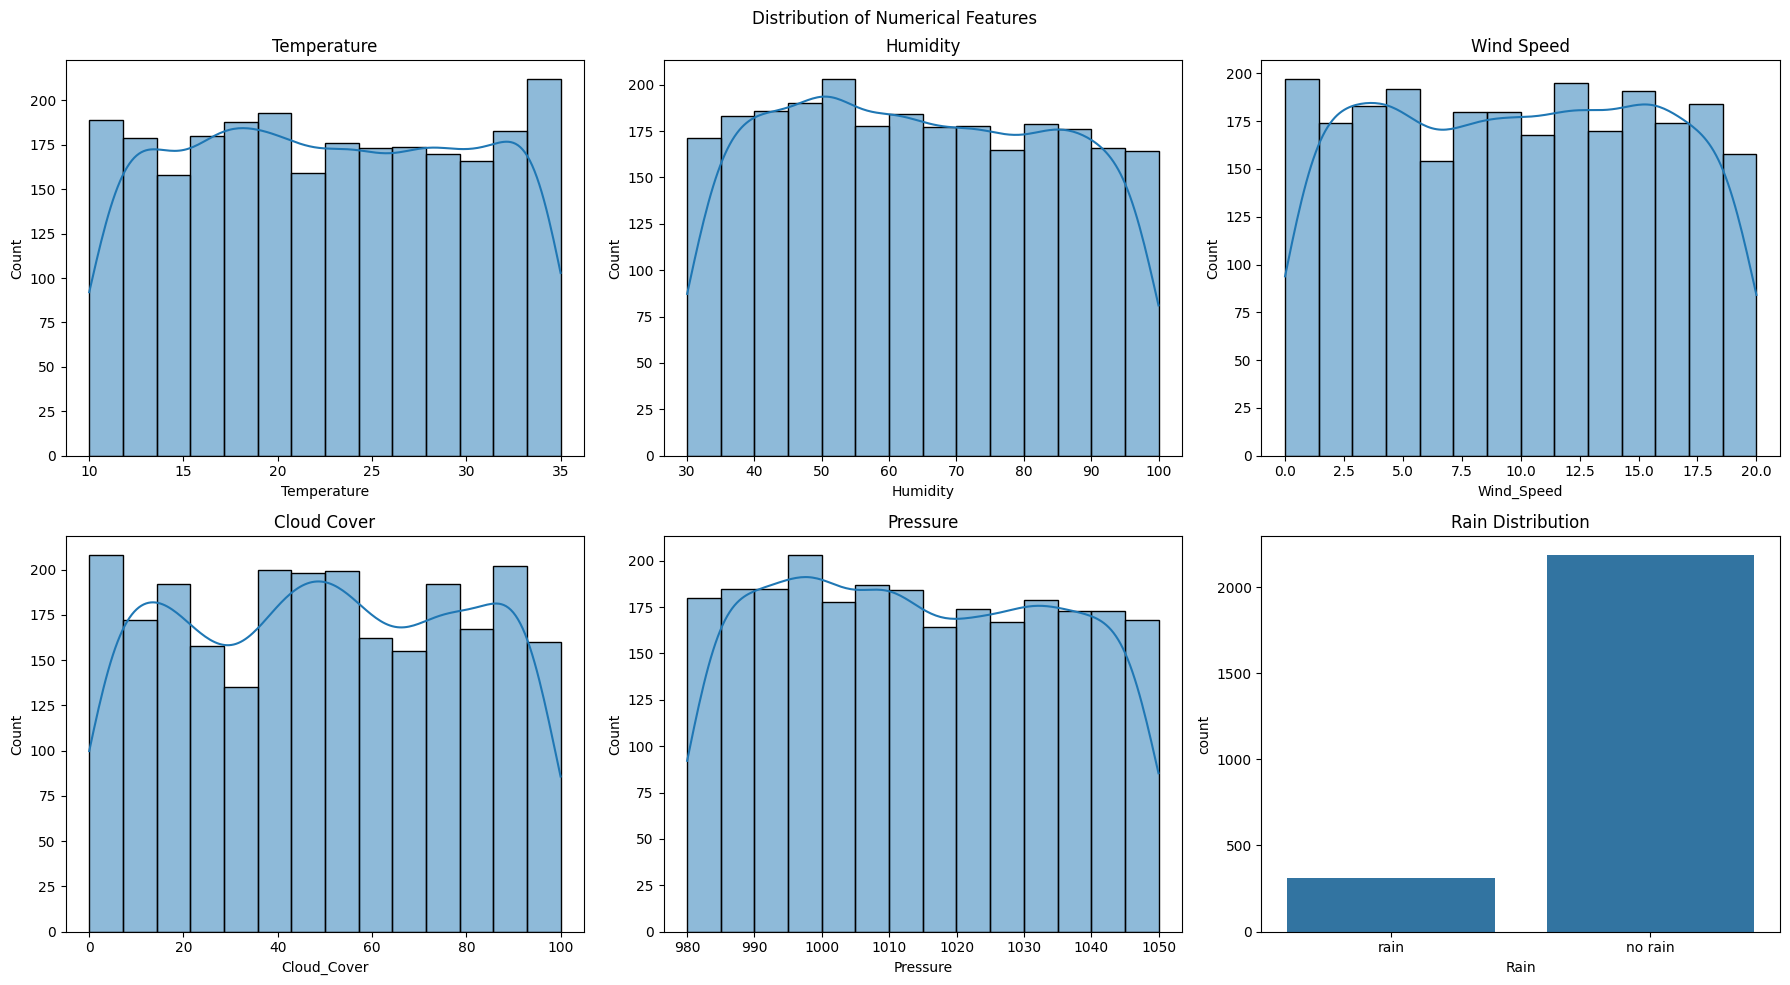

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features')

sns.histplot(data['Temperature'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature')

sns.histplot(data['Humidity'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Humidity')

sns.histplot(data['Wind_Speed'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Wind Speed')

sns.histplot(data['Cloud_Cover'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cloud Cover')

sns.histplot(data['Pressure'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Pressure')

# Distribution of Rain (target variable)
sns.countplot(data=data, x='Rain', ax=axes[1, 2])
axes[1, 2].set_title('Rain Distribution')

plt.tight_layout()
plt.show()

In [9]:
def assign_weather_condition(row):
    if row['Temperature'] > 25 and row['Cloud_Cover'] < 30 and row['Humidity'] < 60:
        return 'Sunny'
    elif row['Cloud_Cover'] > 50 and row['Humidity'] > 60:
        return 'Rainy'
    else:
        return 'Cloudy'


data['WeatherCondition'] = data.apply(assign_weather_condition, axis=1)

In [10]:
data.head()

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain  \
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain   
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain   
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain   
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain   

  WeatherCondition  
0            Rainy  
1            Sunny  
2           Cloudy  
3            Rainy  
4           Cloudy

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       2500 non-null   float64
 1   Humidity          2500 non-null   float64
 2   Wind_Speed        2500 non-null   float64
 3   Cloud_Cover       2500 non-null   float64
 4   Pressure          2500 non-null   float64
 5   Rain              2500 non-null   object 
 6   WeatherCondition  2500 non-null   object 
dtypes: float64(5), object(2)
memory usage: 136.8+ KB


In [12]:
data.drop(columns=['Rain'])

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  \
0       23.720338  89.592641    7.335604    50.501694  1032.378759   
1       27.879734  46.489704    5.952484     4.990053   992.614190   
2       25.069084  83.072843    1.371992    14.855784  1007.231620   
3       23.622080  74.367758    7.050551    67.255282   982.632013   
4       20.591370  96.858822    4.643921    47.676444   980.825142   
...           ...        ...         ...          ...          ...   
2495    21.791602  45.270902   11.807192    55.044682  1017.686181   
2496    27.558479  46.481744   10.884915    39.715133  1008.590961   
2497    28.108274  43.817178    2.897128    75.842952   999.119187   
2498    14.789275  57.908105    2.374717     2.378743  1046.501875   
2499    26.554356  97.101517   18.563084    81.357508  1001.729176   

     WeatherCondition  
0               Rainy  
1               Sunny  
2              Cloudy  
3               Rainy  
4              Cloudy  
...               ...  
2495           Cloudy  
2496           Cloudy  
2497           Cloudy  
2498           Cloudy  
2499            Rainy  

[2500 rows x 6 columns]

<ipython-input-13-ddab069ca029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WeatherCondition', data=data, palette='Set2')


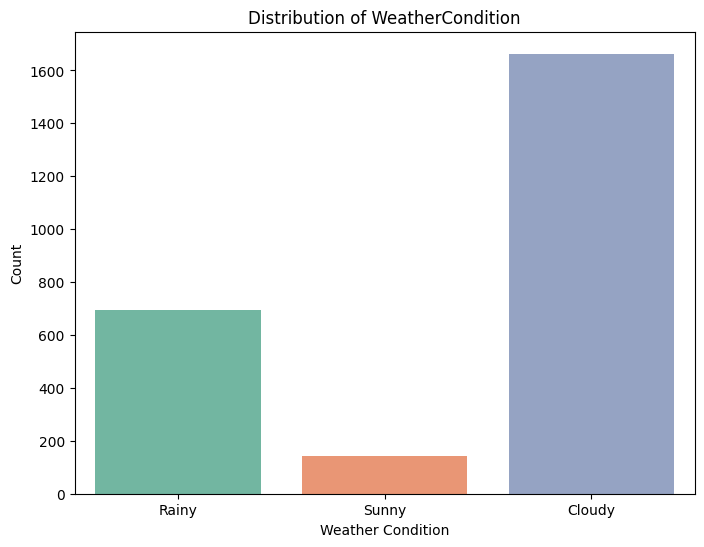

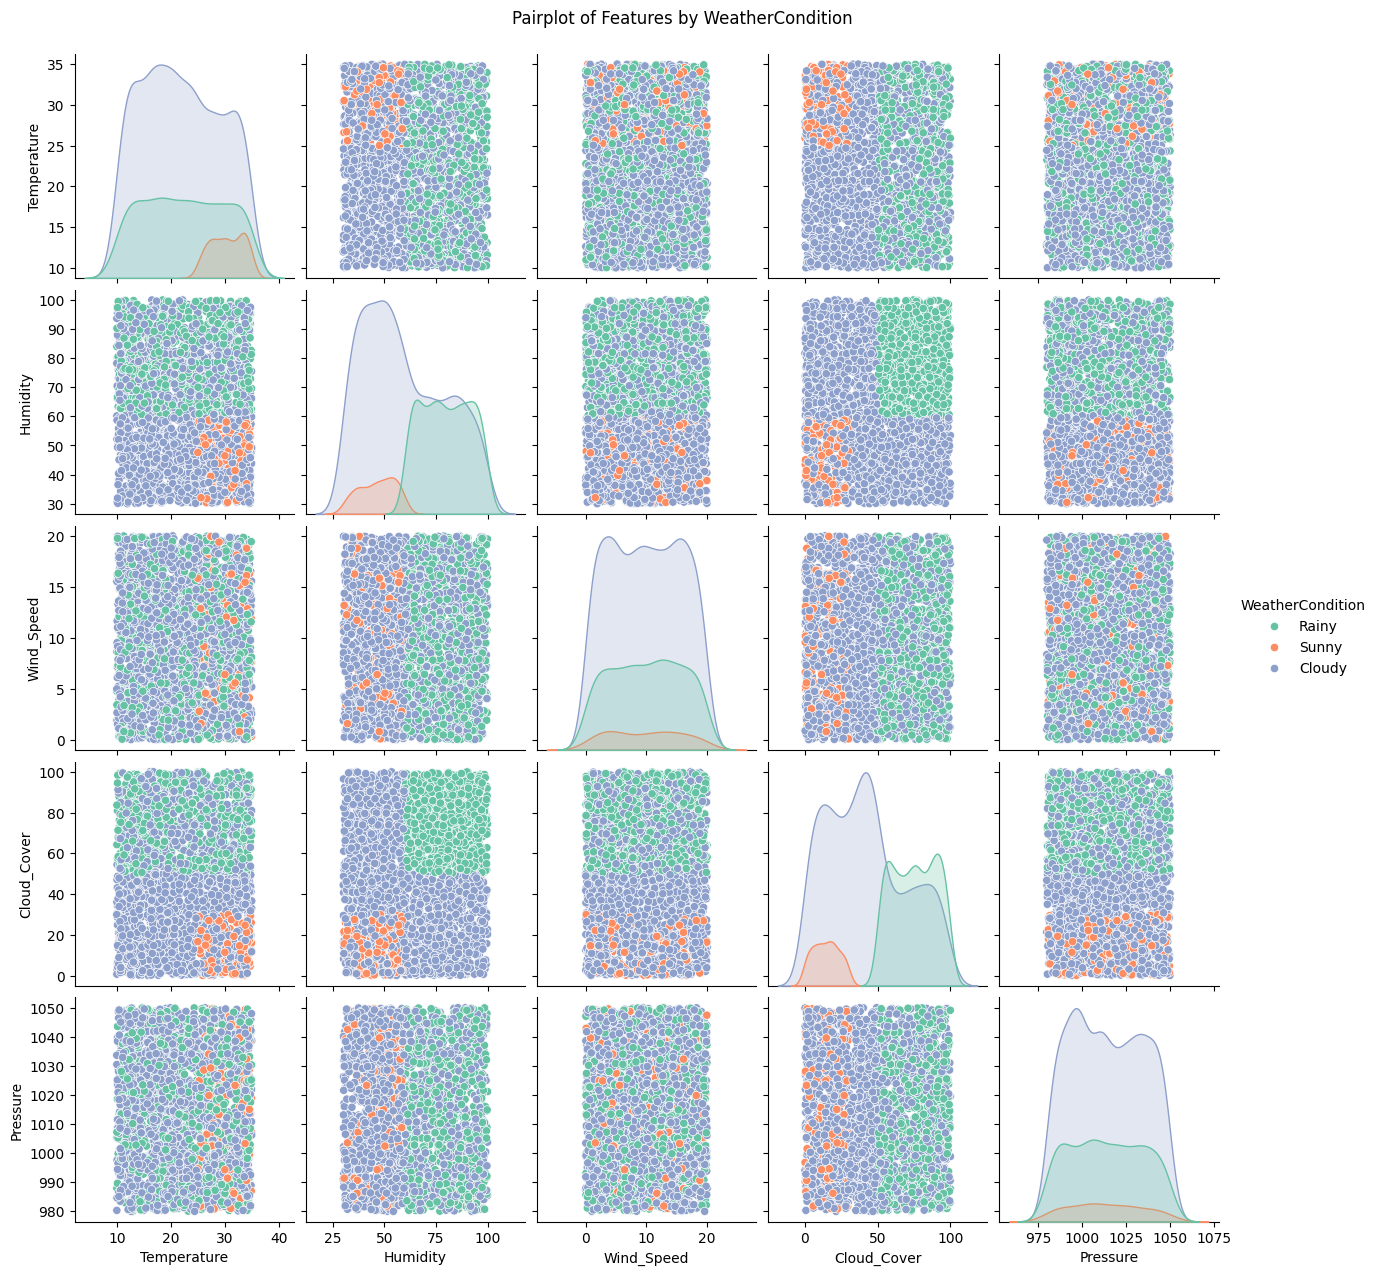

<ipython-input-13-ddab069ca029>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeatherCondition', y='Temperature', data=data, palette='Set2')


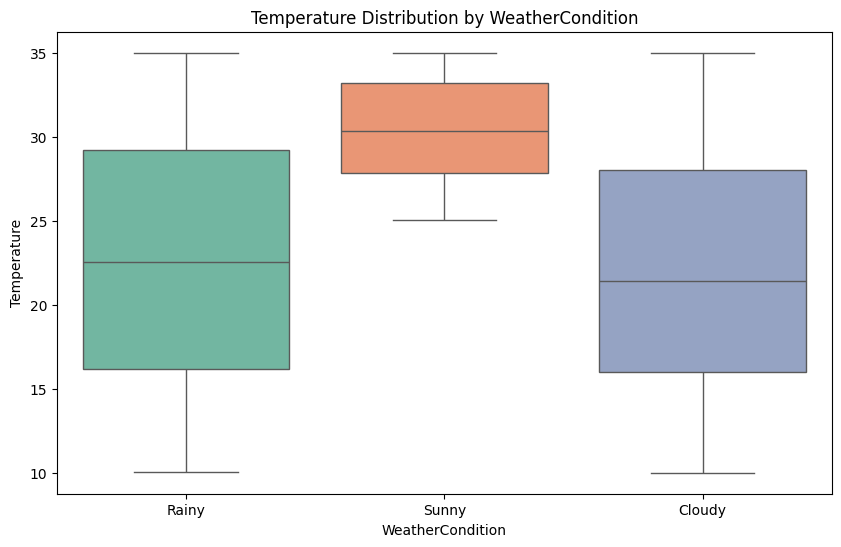

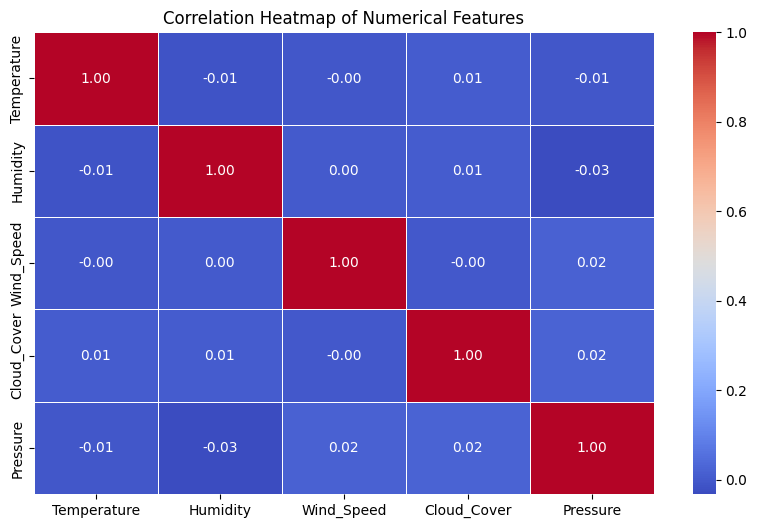

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='WeatherCondition', data=data, palette='Set2')
plt.title('Distribution of WeatherCondition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


sns.pairplot(data[numeric_columns.tolist() + ['WeatherCondition']], hue='WeatherCondition', palette='Set2')
plt.suptitle('Pairplot of Features by WeatherCondition', y=1.02)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='WeatherCondition', y='Temperature', data=data, palette='Set2')
plt.title('Temperature Distribution by WeatherCondition')
plt.show()

plt.figure(figsize=(10, 6))
corr = data[numeric_columns].corr()  # Calculate correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [14]:
from sklearn.utils import resample
import pandas as pd

# Print the count of each category in the 'WeatherCondition' column
print(data['WeatherCondition'].value_counts())

# Filter the original dataset into separate DataFrames based on 'WeatherCondition'
sunny_data = data[data['WeatherCondition'] == 'Sunny']
cloudy_data = data[data['WeatherCondition'] == 'Cloudy']
rainy_data = data[data['WeatherCondition'] == 'Rainy']

# Upsample the 'Sunny' category to match the number of samples in the 'Cloudy' category
sunny_upsampled = resample(sunny_data,
                           replace=True,  # Sample with replacement
                           n_samples=len(cloudy_data),  # Match the size of 'Cloudy' category
                           random_state=42)  # Ensure reproducibility

# Upsample the 'Rainy' category to match the number of samples in the 'Cloudy' category
rainy_upsampled = resample(rainy_data,
                           replace=True,  # Sample with replacement
                           n_samples=len(cloudy_data),  # Match the size of 'Cloudy' category
                           random_state=42)  # Ensure reproducibility

# Combine the upsampled and original 'Cloudy' data to create a balanced dataset
data_balanced = pd.concat([sunny_upsampled, cloudy_data, rainy_upsampled])

# Shuffle the balanced dataset and reset the index
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the count of each category in the balanced dataset to verify the results
print(data_balanced['WeatherCondition'].value_counts())



WeatherCondition
Cloudy    1663
Rainy      695
Sunny      142
Name: count, dtype: int64
WeatherCondition
Cloudy    1663
Sunny     1663
Rainy     1663
Name: count, dtype: int64


In [15]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       4989 non-null   float64
 1   Humidity          4989 non-null   float64
 2   Wind_Speed        4989 non-null   float64
 3   Cloud_Cover       4989 non-null   float64
 4   Pressure          4989 non-null   float64
 5   Rain              4989 non-null   object 
 6   WeatherCondition  4989 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.0+ KB


<ipython-input-16-7b32f6f4c93d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WeatherCondition', data=data_balanced, palette='Set2')


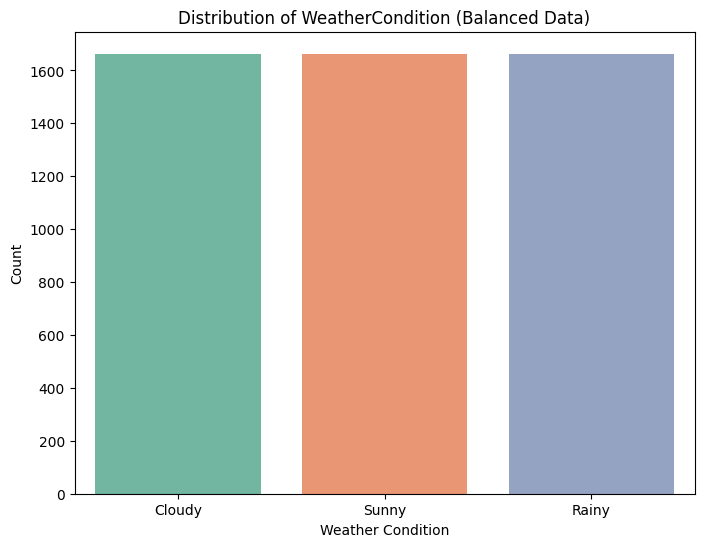

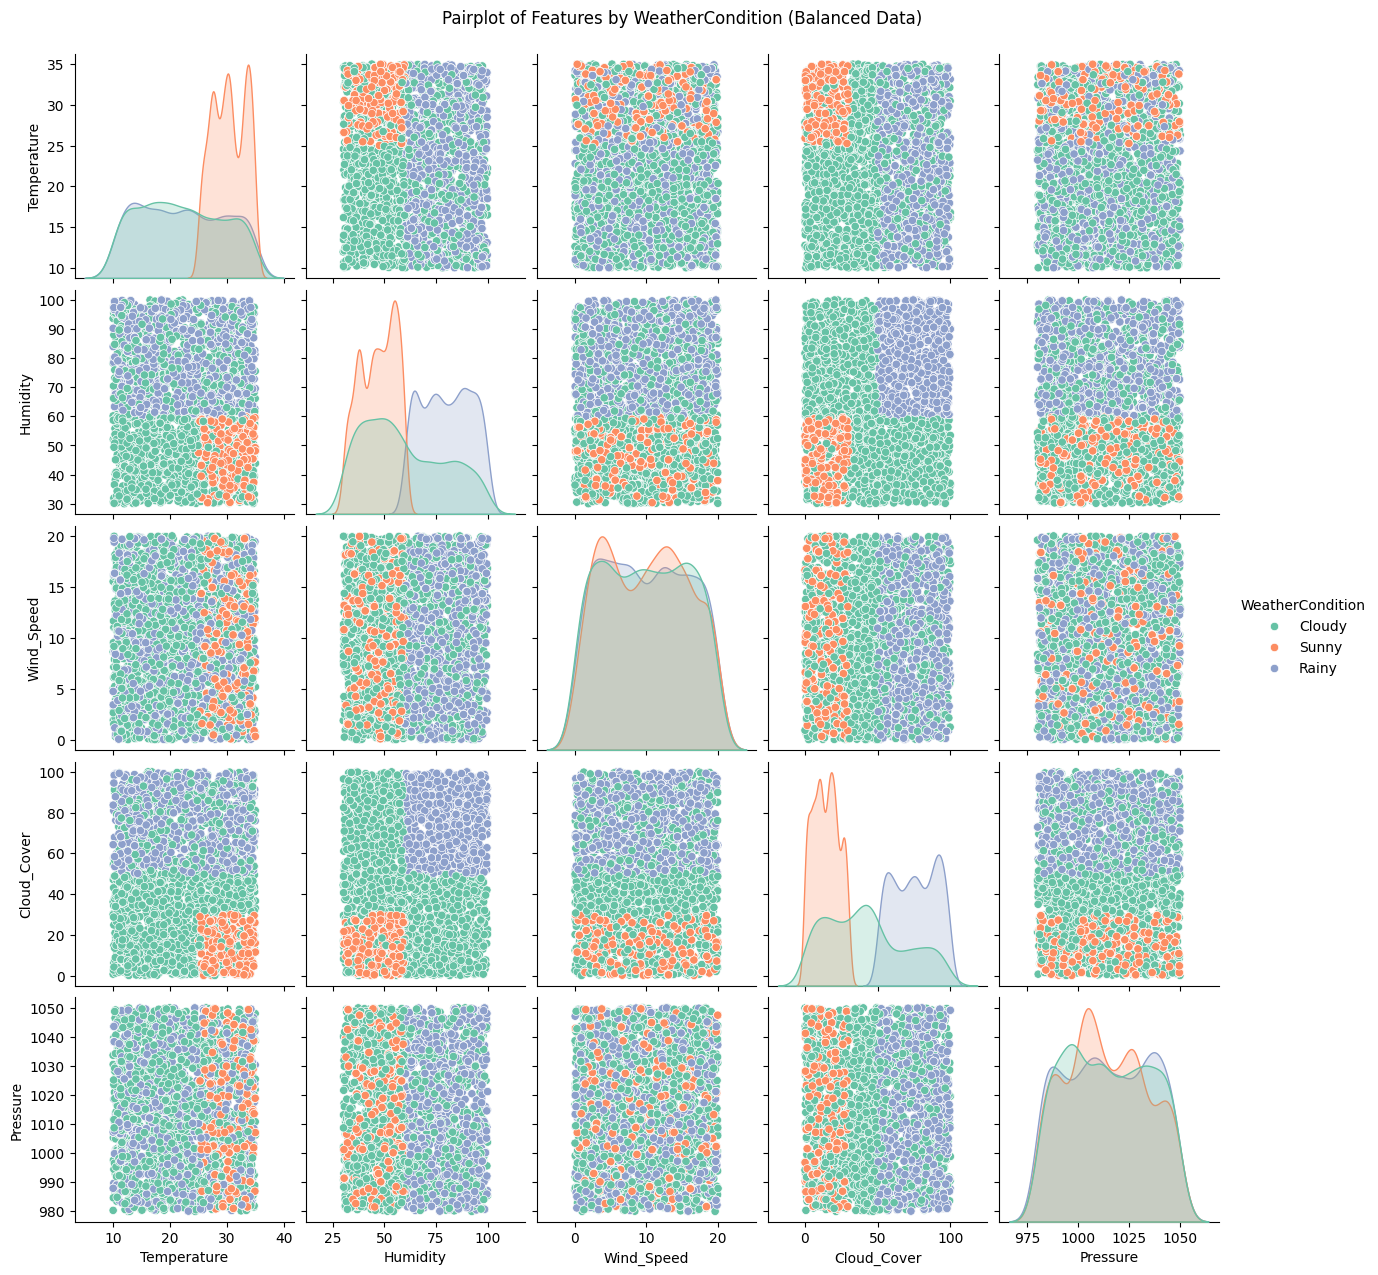

<ipython-input-16-7b32f6f4c93d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeatherCondition', y='Temperature', data=data_balanced, palette='Set2')


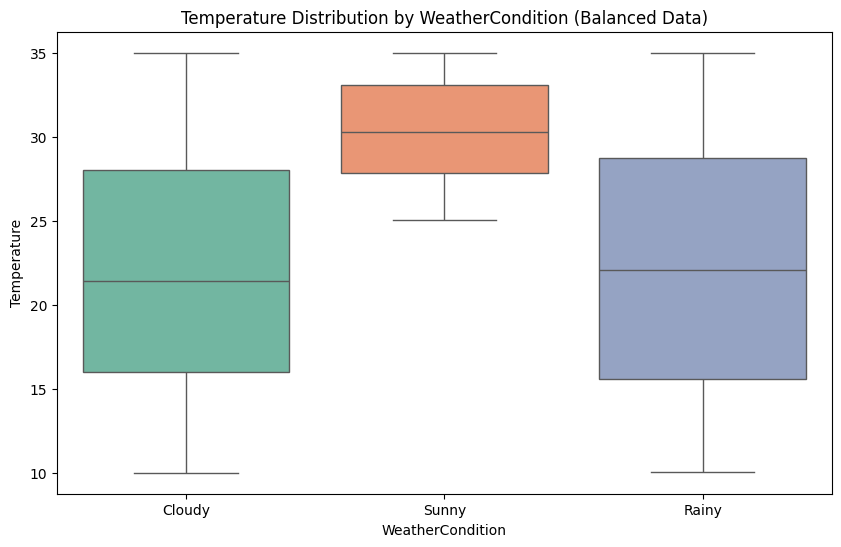

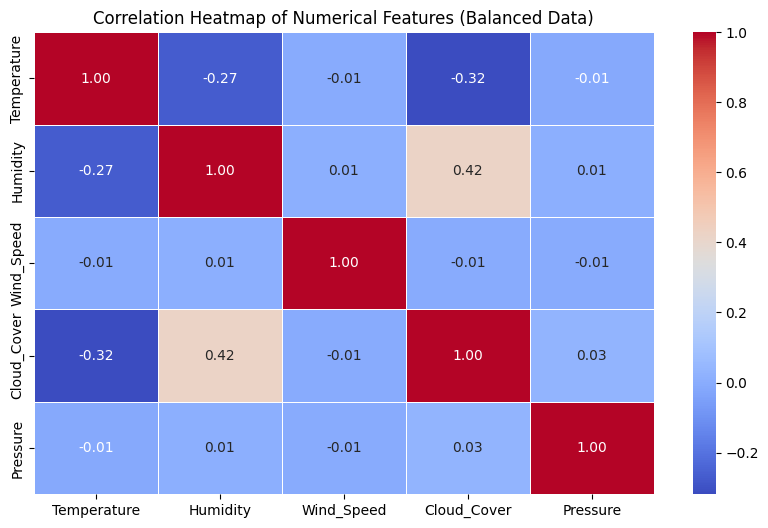

In [16]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualizing the distribution of WeatherCondition (Bar plot) with the balanced dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='WeatherCondition', data=data_balanced, palette='Set2')
plt.title('Distribution of WeatherCondition (Balanced Data)')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

# 2. Pairplot to visualize relationships between features and WeatherCondition
# We need to select numeric columns from the balanced dataset for the pairplot
numeric_columns = data_balanced.select_dtypes(include=['float64', 'int64']).columns

# Add the target 'WeatherCondition' to the numeric columns for visualization
sns.pairplot(data_balanced[numeric_columns.tolist() + ['WeatherCondition']], hue='WeatherCondition', palette='Set2')
plt.suptitle('Pairplot of Features by WeatherCondition (Balanced Data)', y=1.02)
plt.show()

# 3. Box plot to check the distribution of numerical features across different weather conditions
# Example: Visualize the distribution of Temperature across different weather conditions in the balanced data
plt.figure(figsize=(10, 6))
sns.boxplot(x='WeatherCondition', y='Temperature', data=data_balanced, palette='Set2')
plt.title('Temperature Distribution by WeatherCondition (Balanced Data)')
plt.show()

# 4. Correlation heatmap for the numerical features in the balanced dataset
# This helps to see correlations between features and target (if features are numeric)
plt.figure(figsize=(10, 6))
corr = data_balanced[numeric_columns].corr()  # Calculate correlation matrix for balanced data
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Balanced Data)')
plt.show()


In [17]:
data_balanced.drop(columns=['Rain'])

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  \
0       10.330921  55.841284   17.766559    43.851409  1004.988950   
1       27.879734  46.489704    5.952484     4.990053   992.614190   
2       29.601465  52.520709   13.859806    24.311812  1007.142465   
3       28.935164  53.985840    2.664468    14.102453  1038.031289   
4       19.905569  86.361647   12.743713    91.047083  1044.853189   
...           ...        ...         ...          ...          ...   
4984    31.648637  72.515538    0.448056    52.084103   992.061139   
4985    27.440780  42.464612    3.178378    20.895919  1034.616491   
4986    15.084896  91.653822   15.454505    34.555543  1049.543206   
4987    29.995748  70.048004   14.834848    88.526671  1041.272075   
4988    26.604928  30.364419   10.793913    21.572720  1001.225552   

     WeatherCondition  
0              Cloudy  
1               Sunny  
2               Sunny  
3               Sunny  
4               Rainy  
...               ...  
4984            Rainy  
4985            Sunny  
4986           Cloudy  
4987            Rainy  
4988            Sunny  

[4989 rows x 6 columns]

In [18]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Prepare Features (X) and Target (y)
X = data_balanced.drop(columns=['WeatherCondition','Rain'])
y = data_balanced['WeatherCondition']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (important for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)

#  SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test_scaled)

# Step 6: Evaluate both models
# KNN Evaluation
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# SVM Evaluation
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))


KNN Model Performance:
Accuracy: 0.9559118236472945
              precision    recall  f1-score   support

      Cloudy       0.98      0.88      0.93       318
       Rainy       0.93      0.98      0.95       332
       Sunny       0.97      1.00      0.98       348

    accuracy                           0.96       998
   macro avg       0.96      0.95      0.95       998
weighted avg       0.96      0.96      0.96       998

SVM Model Performance:
Accuracy: 0.8847695390781564
              precision    recall  f1-score   support

      Cloudy       0.82      0.81      0.82       318
       Rainy       0.90      0.89      0.89       332
       Sunny       0.93      0.95      0.94       348

    accuracy                           0.88       998
   macro avg       0.88      0.88      0.88       998
weighted avg       0.88      0.88      0.88       998



In [19]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params, cv=5, n_jobs=-1, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

# Best KNN parameters and performance
print("Best KNN Parameters:", knn_grid_search.best_params_)
print("Best KNN Accuracy on Training Data:", knn_grid_search.best_score_)

# Predict with the best KNN model
y_pred_knn_tuned = knn_grid_search.predict(X_test_scaled)

# KNN Evaluation
print("Tuned KNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_tuned)}")
print(classification_report(y_test, y_pred_knn_tuned))

# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Setup GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_params, cv=5, n_jobs=-1, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

# Best SVM parameters and performance
print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM Accuracy on Training Data:", svm_grid_search.best_score_)

# Predict with the best SVM model
y_pred_svm_tuned = svm_grid_search.predict(X_test_scaled)

# SVM Evaluation
print("Tuned SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_tuned)}")
print(classification_report(y_test, y_pred_svm_tuned))


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Accuracy on Training Data: 0.9571547768043388
Tuned KNN Model Performance:
Accuracy: 0.968937875751503
              precision    recall  f1-score   support

      Cloudy       0.99      0.91      0.95       318
       Rainy       0.93      0.99      0.96       332
       Sunny       0.98      1.00      0.99       348

    accuracy                           0.97       998
   macro avg       0.97      0.97      0.97       998
weighted avg       0.97      0.97      0.97       998

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy on Training Data: 0.9779523903626401
Tuned SVM Model Performance:
Accuracy: 0.9829659318637275
              precision    recall  f1-score   support

      Cloudy       0.99      0.96      0.97       318
       Rainy       0.98      0.99      0.98       332
       Sunny       0.98      1.00      0.99       348

    accuracy            

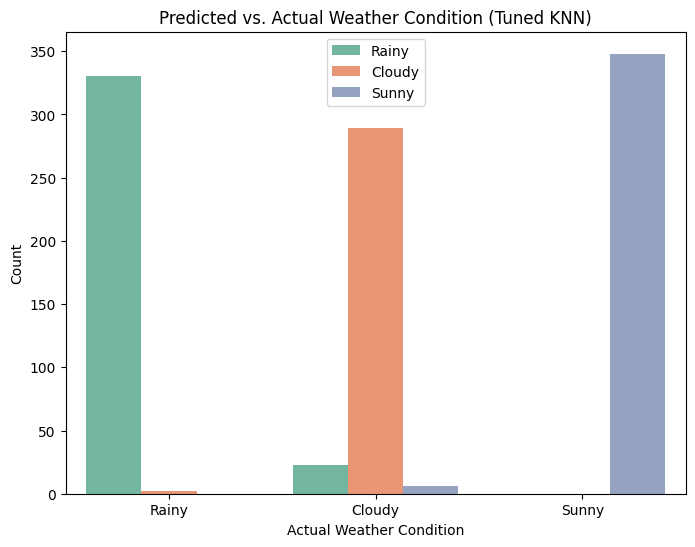

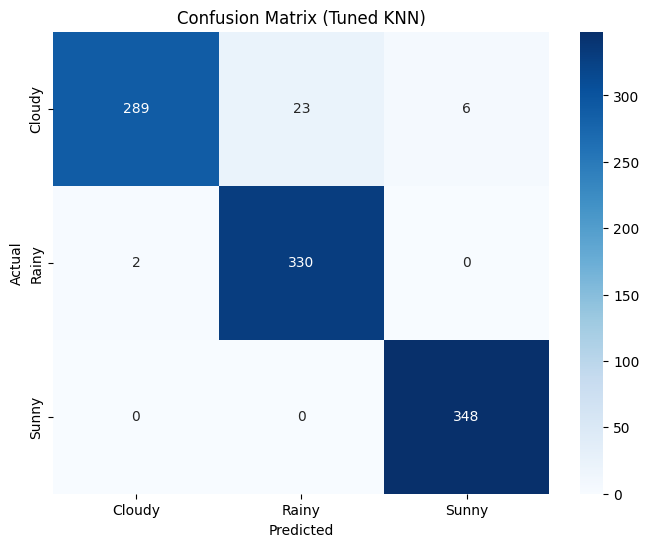

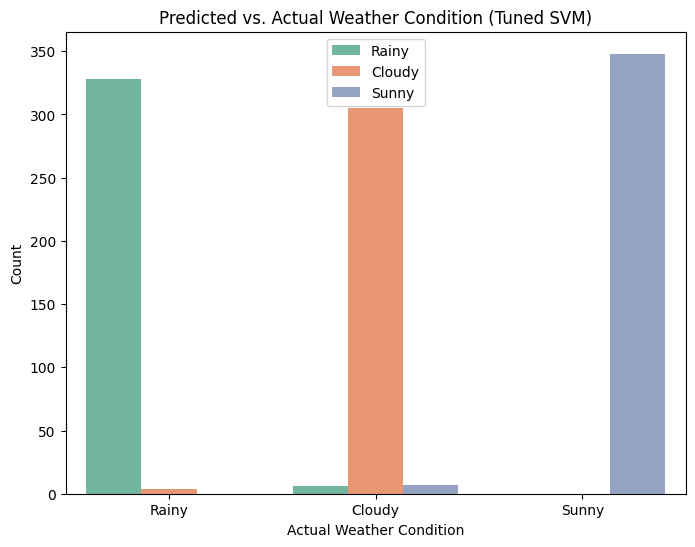

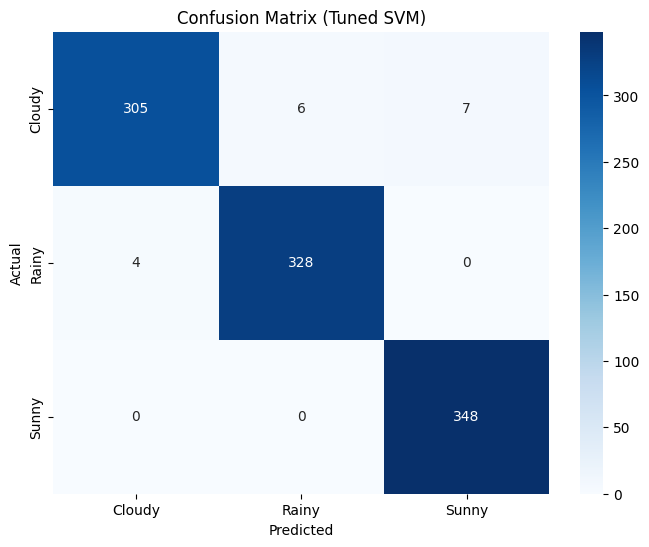

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the predicted vs. actual weather conditions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, hue=y_pred_knn_tuned, palette='Set2')
plt.title('Predicted vs. Actual Weather Condition (Tuned KNN)')
plt.xlabel('Actual Weather Condition')
plt.ylabel('Count')
plt.show()


from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cloudy', 'Rainy', 'Sunny'],
            yticklabels=['Cloudy', 'Rainy', 'Sunny'])
plt.title('Confusion Matrix (Tuned KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, hue=y_pred_svm_tuned, palette='Set2')
plt.title('Predicted vs. Actual Weather Condition (Tuned SVM)')
plt.xlabel('Actual Weather Condition')
plt.ylabel('Count')
plt.show()


from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cloudy', 'Rainy', 'Sunny'],
            yticklabels=['Cloudy', 'Rainy', 'Sunny'])
plt.title('Confusion Matrix (Tuned SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()